In [1]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
stl_filename = r"C:\Users\Emman\Desktop\JE\Ortho\STL-Segmentation\OrthoCAD_Export_43495989\43495989_shell_occlusion_l.stl"
mesh=trimesh.load(stl_filename)

In [350]:
mesh.show()

In [2]:
import stltovoxel
import numpy as np
import matplotlib.pyplot as plt
input=stl_filename
output=stl_filename[:-3]+"npy"
stltovoxel.convert_file(input, output, voxel_size=0.2)

Processing layer 0/160
Processing layer 1/160
Processing layer 2/160
Processing layer 3/160
Processing layer 4/160
Processing layer 5/160
Processing layer 6/160
Processing layer 7/160
Processing layer 8/160
Processing layer 9/160
Processing layer 10/160
Processing layer 11/160
Processing layer 12/160
Processing layer 13/160
Processing layer 14/160
Processing layer 15/160
Processing layer 16/160
Processing layer 17/160
Processing layer 18/160
Processing layer 19/160
Processing layer 20/160
Processing layer 21/160
Processing layer 22/160
Processing layer 23/160
Processing layer 24/160
Processing layer 25/160
Processing layer 26/160
Processing layer 27/160
Processing layer 28/160
Processing layer 29/160
Processing layer 30/160
Processing layer 31/160
Processing layer 32/160
Processing layer 33/160
Processing layer 34/160
Processing layer 35/160
Processing layer 36/160
Processing layer 37/160
Processing layer 38/160
Processing layer 39/160
Processing layer 40/160
Processing layer 41/160
Pr

In [3]:
voxel=np.load(stl_filename[:-3]+"npy")

In [354]:
voxel[0]

array([ -4.47749378, -26.27422714,   0.2012603 ])

In [355]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.scatter(voxel.T[0],voxel.T[1],voxel.T[2])

Error in callback <function _draw_all_if_interactive at 0x000001184C3F8D30> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000011801A054C0> (for post_execute):


KeyboardInterrupt: 

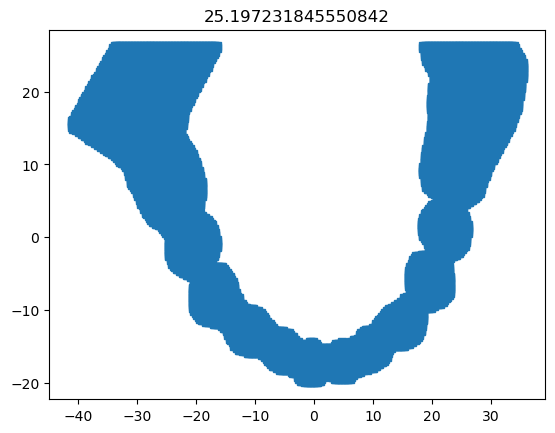

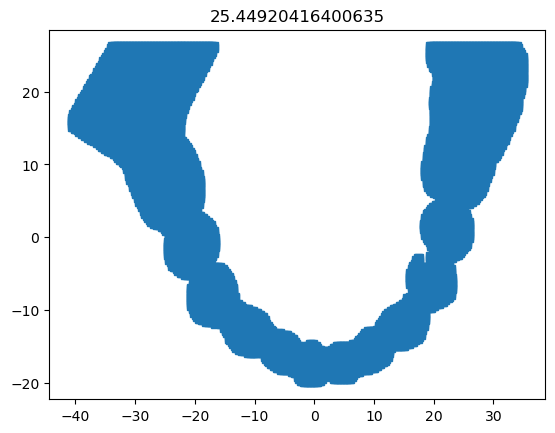

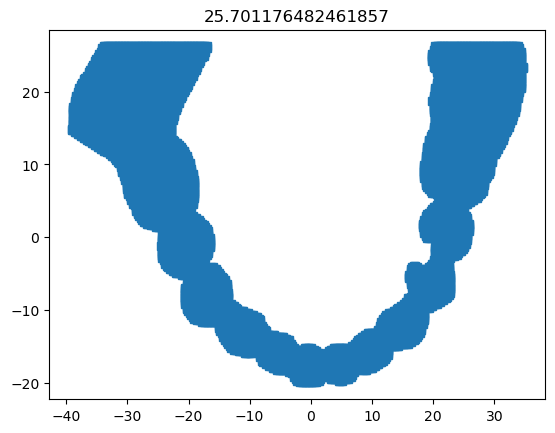

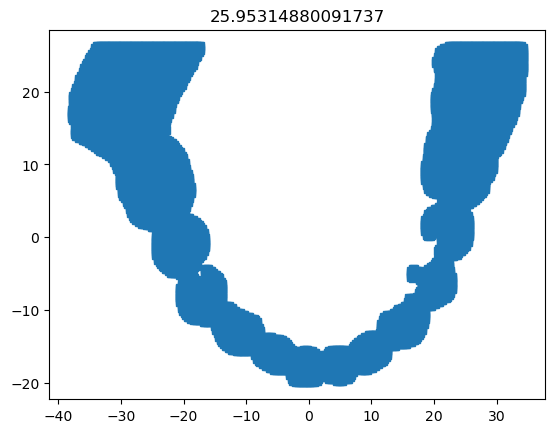

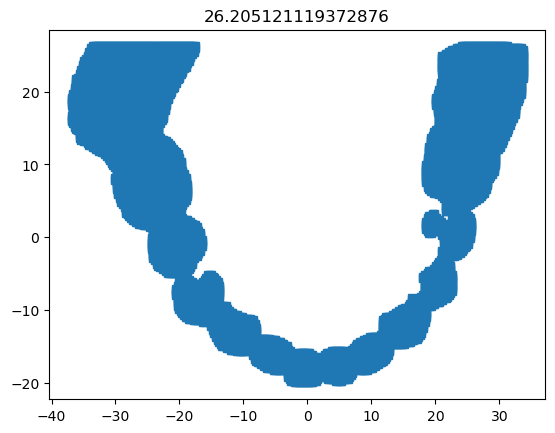

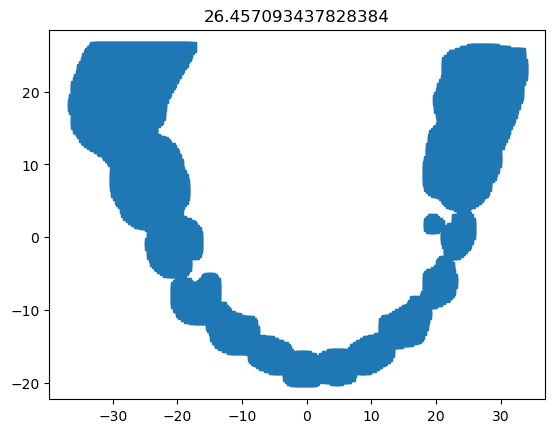

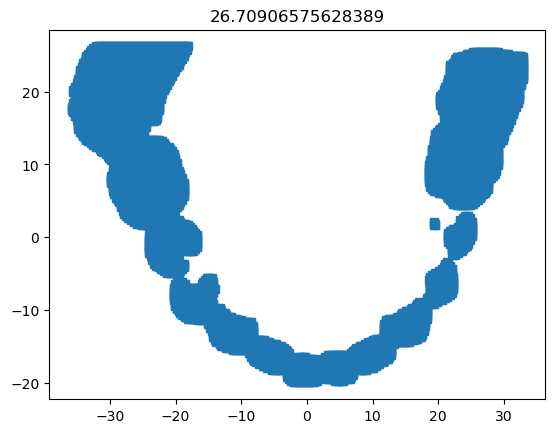

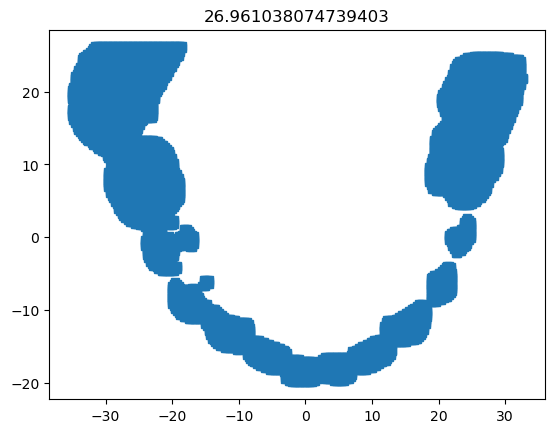

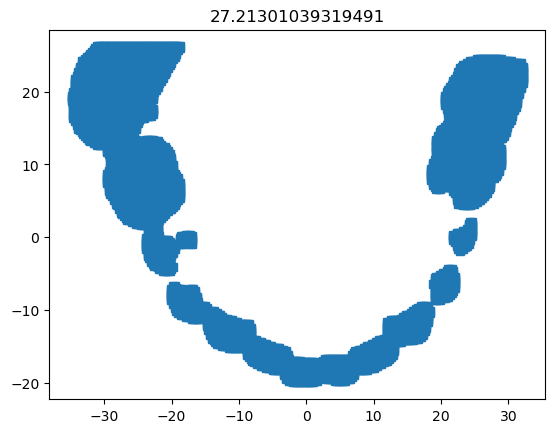

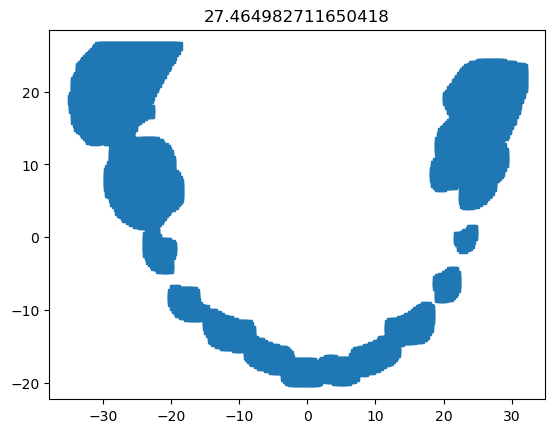

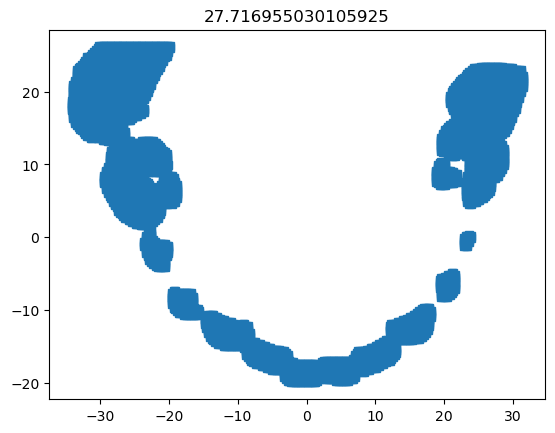

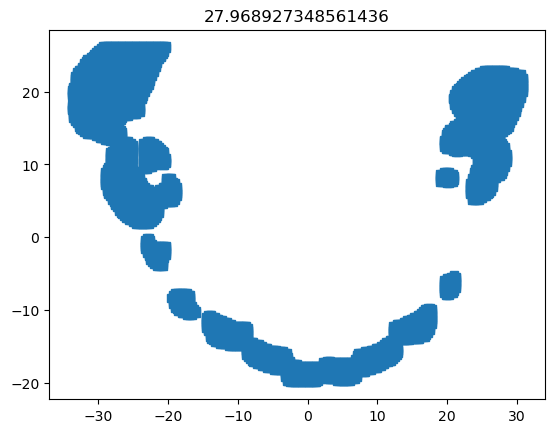

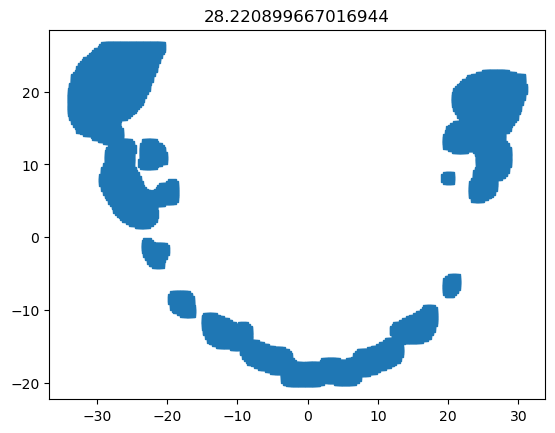

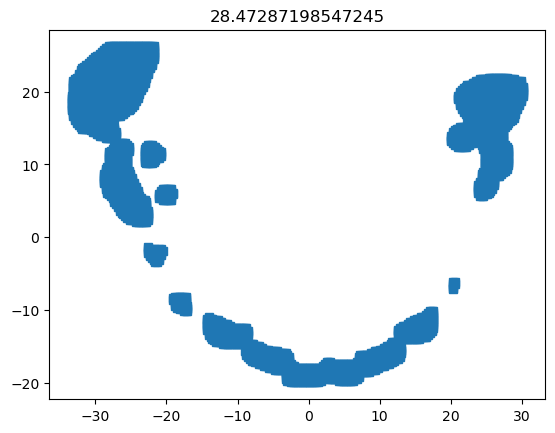

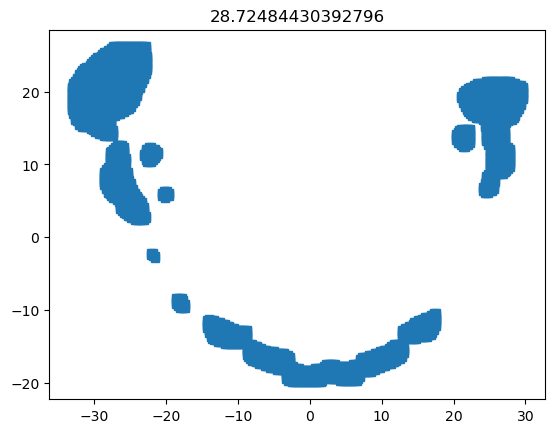

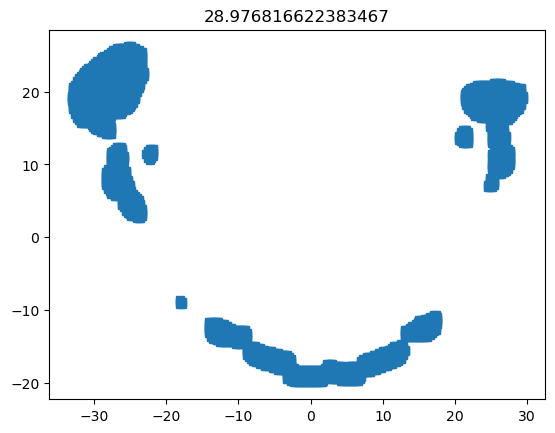

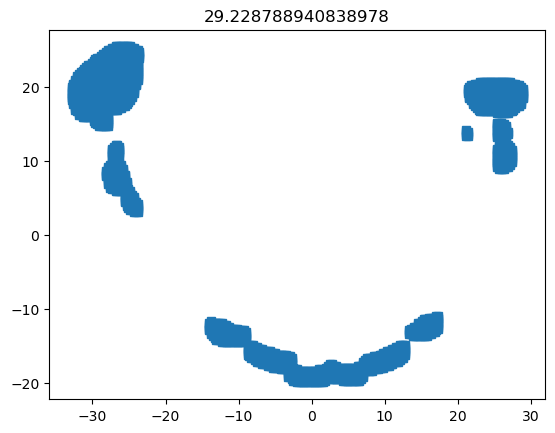

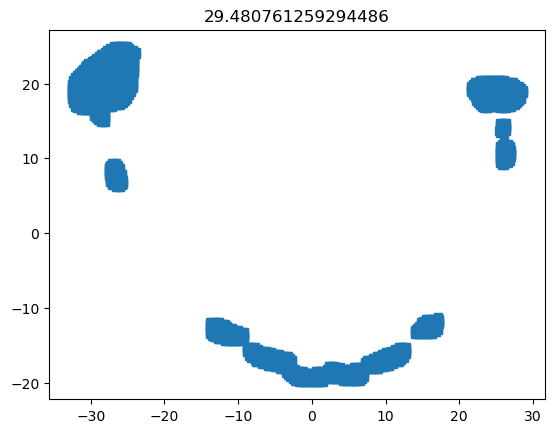

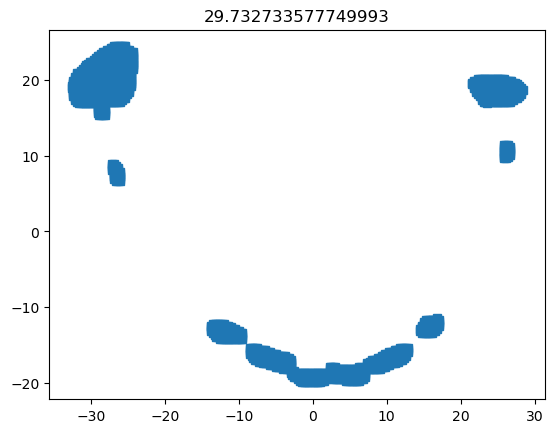

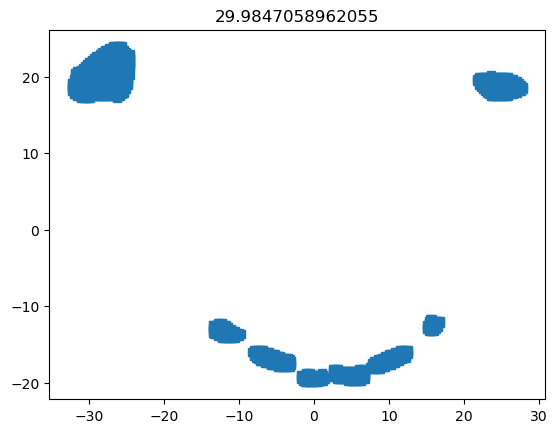

In [ ]:
import numpy as np
slice=np.array([])
for z in np.unique(voxel[:,2]):
    if z<30 and z>25:
        if (slice.shape!=(voxel[voxel[:,2]==z]).shape) or (slice!=voxel[voxel[:,2]==z]).any():
            slice=voxel[voxel[:,2]==z]
            plt.plot(slice[:,0],slice[:,1],marker='s',linestyle='None')
            plt.title(str(z))
            plt.show()

In [11]:
voxel2=voxel[voxel[:,2]<30]
voxel2=voxel2[voxel2[:,2]>25]
voxel2=np.unique(voxel2,axis=0)
len(voxel),len(voxel2)

(8461377, 331189)

In [38]:
z_slice=[]
for z in np.unique(voxel2[:,2]):
    z_slice.append(voxel[voxel[:,2]==z][:,:-1])

In [366]:
kmeans.labels_

array([1, 0], dtype=int64)

Number of Labels:  9


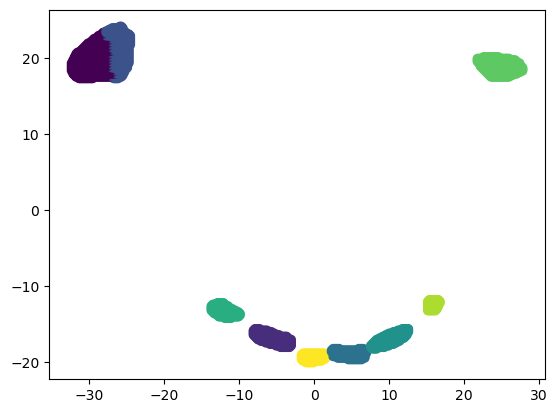

In [368]:
from sklearn.cluster import KMeans,AffinityPropagation,MeanShift,AgglomerativeClustering,SpectralClustering
X = z_slice[-1]


#kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit(X)
kmeans = AgglomerativeClustering(n_clusters=None,distance_threshold=50).fit(X)
print("Number of Labels: ",len(np.unique(kmeans.labels_)))
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)

c:\Users\Emman\anaconda3\envs\ortho\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Number of Labels:  8


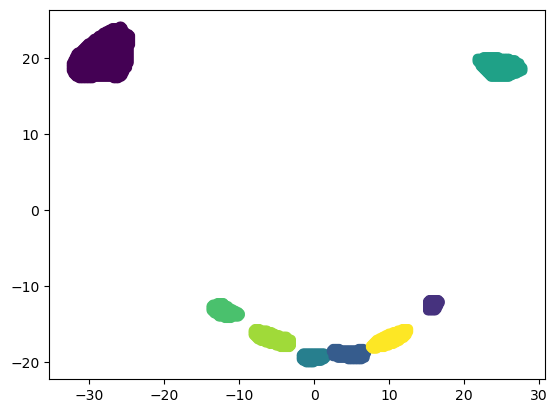

In [369]:
from sklearn.cluster import KMeans,AffinityPropagation,MeanShift,AgglomerativeClustering,SpectralClustering
X = z_slice[-1]


#kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit(X)
kmeans = SpectralClustering(n_clusters=8).fit(X)
print("Number of Labels: ",len(np.unique(kmeans.labels_)))
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)

In [372]:
from sklearn.cluster import KMeans,AffinityPropagation,MeanShift,AgglomerativeClustering,SpectralClustering
X = z_slice[0]


#kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit(X)
kmeans = SpectralClustering(n_clusters=12,n_components=2,n_init=1).fit(X)
print("Number of Labels: ",len(np.unique(kmeans.labels_)))
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)

Number of Labels:  10


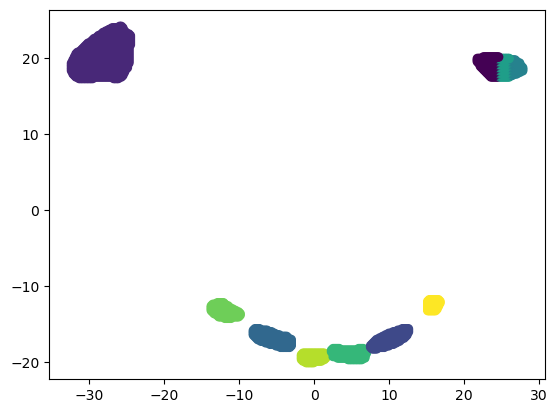

In [315]:
from sklearn.cluster import KMeans,AffinityPropagation,MeanShift,AgglomerativeClustering
X = z_slice[-1]

def transform(arr):
    return np.exp(arr)
data_x=X[:,0].copy()
data_y=X[:,1].copy()
data_x=(data_x-np.min(data_x))
data_x=data_x/np.max(data_x)
data_y=(data_y-np.min(data_y))
data_y=data_y/np.max(data_y)
data_x=transform(data_x)
data_y=transform(data_x)
data=np.array([data_x,data_y]).T
#kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit(X)
kmeans = AgglomerativeClustering(n_clusters=None,distance_threshold=7).fit(data)
print("Number of Labels: ",len(np.unique(kmeans.labels_)))
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)

Number of Labels:  12


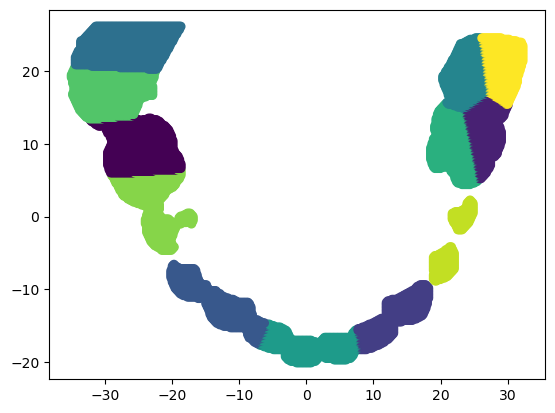

In [349]:
from sklearn.cluster import KMeans,AffinityPropagation,MeanShift,AgglomerativeClustering
X = z_slice[-15]

def transform(arr):
    return arr
data_x=X[:,0].copy()
data_y=X[:,1].copy()
data_x=(data_x-np.min(data_x))
data_x=data_x/np.max(data_x)
data_y=(data_y-np.min(data_y))
data_y=data_y/np.max(data_y)
data_x=transform(data_x)
data_y=transform(data_y)
data=np.array([data_x,data_y,data_y**2,data_x**2,data_x**4]).T
kmeans = KMeans(n_clusters=12, random_state=0, n_init="auto").fit(data)
#kmeans = AgglomerativeClustering(n_clusters=None,distance_threshold=20).fit(data)
print("Number of Labels: ",len(np.unique(kmeans.labels_)))
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)

In [285]:
data_x=X[:,0]
data_y=X[:,1]
data_label=kmeans.labels_
data=np.array([data_x,data_y,data_label])

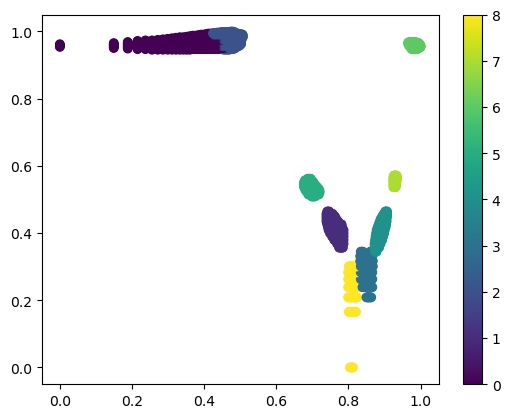

In [294]:
data_x=(data_x-np.min(data_x))
data_x=data_x/np.max(data_x)
data_y=(data_y-np.min(data_y))
data_y=data_y/np.max(data_y)
plt.scatter(data_x**(1/3),data_y**(1/3),c=kmeans.labels_)
plt.colorbar()

Number of Labels:  12


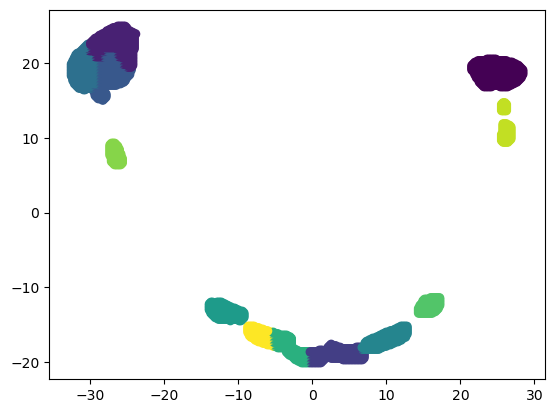

In [118]:
from sklearn.cluster import KMeans,AffinityPropagation,MeanShift,AgglomerativeClustering
X = z_slice[-3]
#kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit(X)
kmeans = AgglomerativeClustering(n_clusters=None,distance_threshold=47).fit(X)
print("Number of Labels: ",len(np.unique(kmeans.labels_)))
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)

Number of Labels:  10


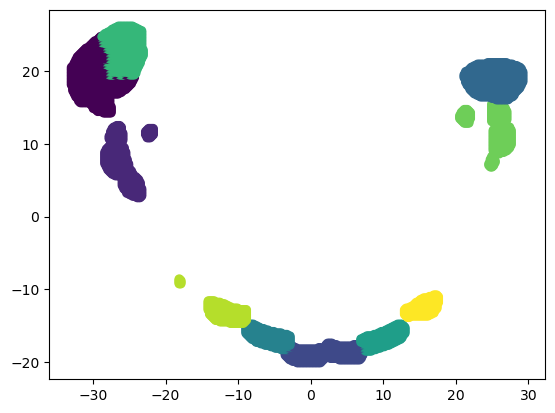

In [124]:
from sklearn.cluster import KMeans,AffinityPropagation,MeanShift,AgglomerativeClustering
X = z_slice[-6]
kmeans = AgglomerativeClustering(n_clusters=None,distance_threshold=100).fit(X)
print("Number of Labels: ",len(np.unique(kmeans.labels_)))
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)

Number of Labels:  15


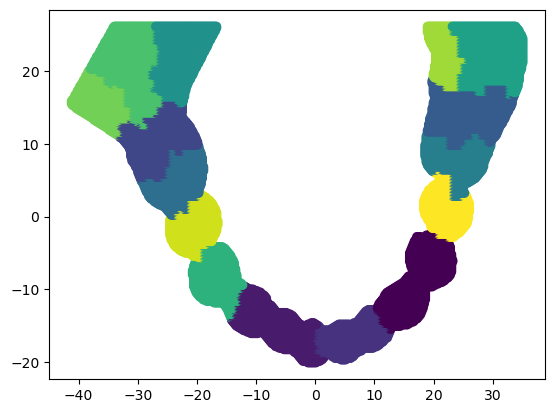

In [149]:
from sklearn.cluster import KMeans,AffinityPropagation,MeanShift,AgglomerativeClustering
X = z_slice[1]
#kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit(X)
kmeans = AgglomerativeClustering(n_clusters=None,distance_threshold=250).fit(X)
print("Number of Labels: ",len(np.unique(kmeans.labels_)))
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)

Number of Labels:  14


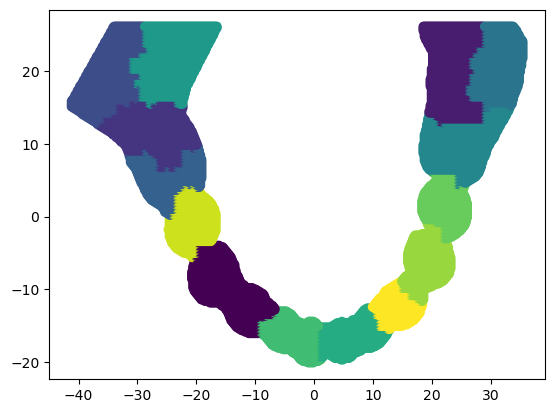

Number of Labels:  15


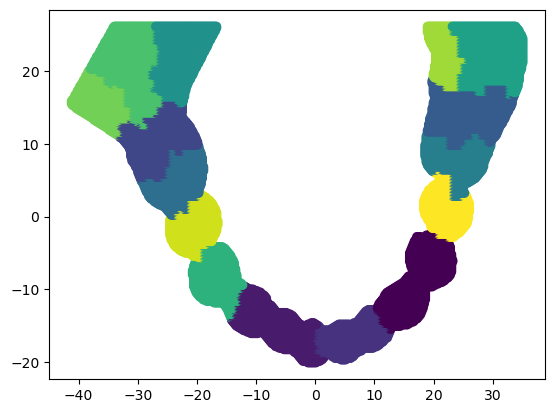

Number of Labels:  14


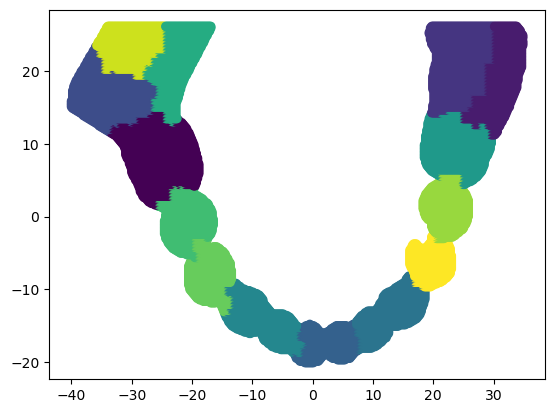

Number of Labels:  15


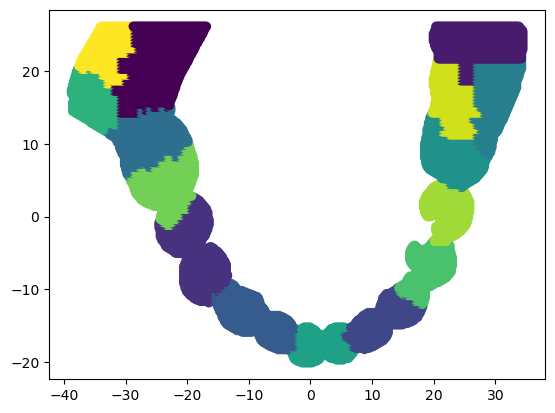

Number of Labels:  16


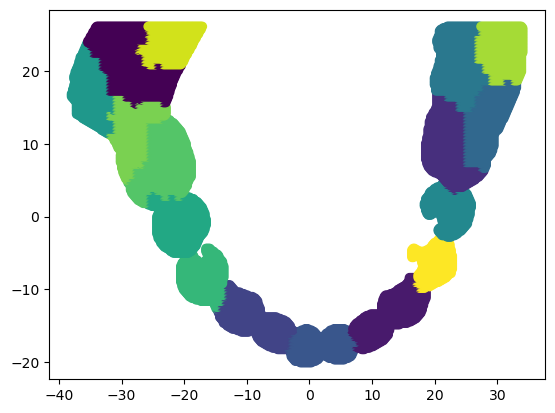

Number of Labels:  14


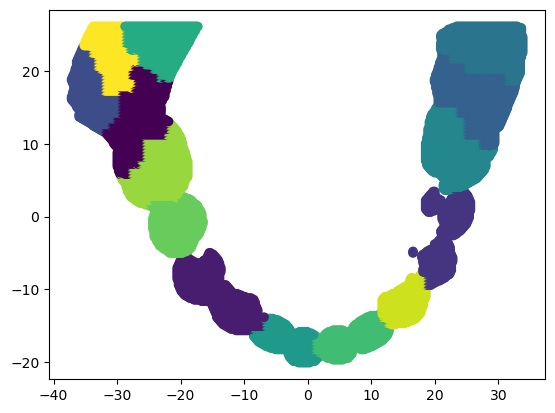

Number of Labels:  16


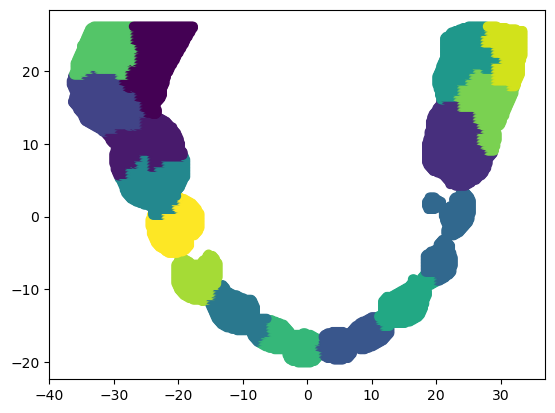

Number of Labels:  14


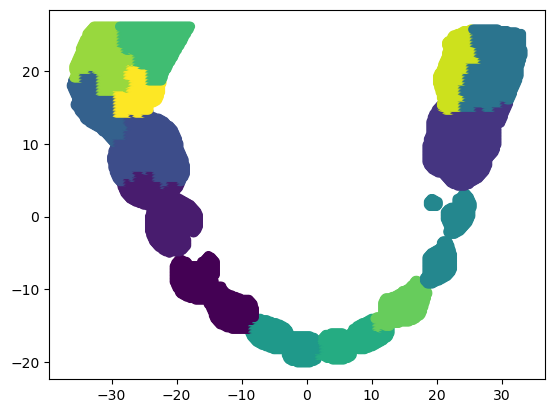

Number of Labels:  13


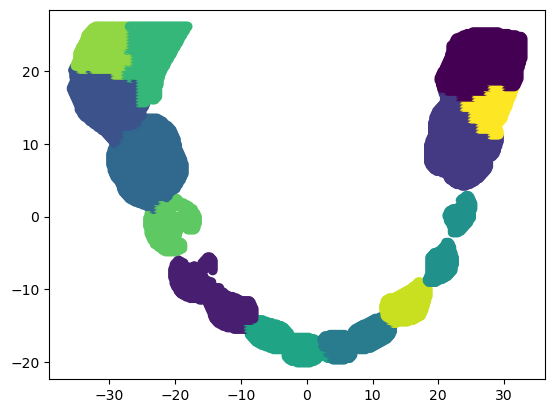

Number of Labels:  14


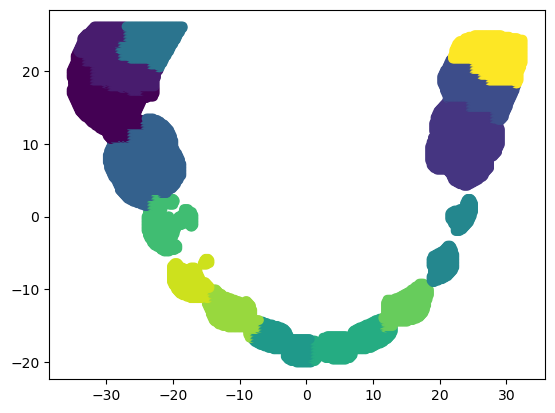

Number of Labels:  14


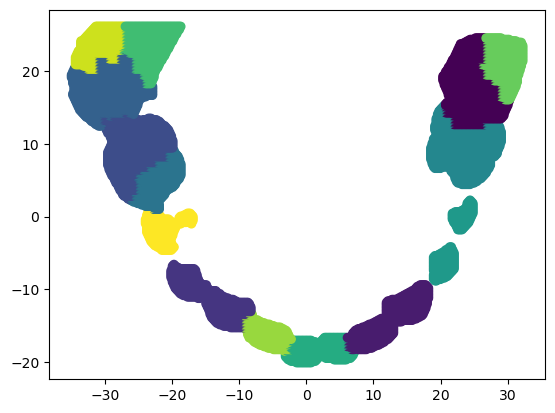

Number of Labels:  14


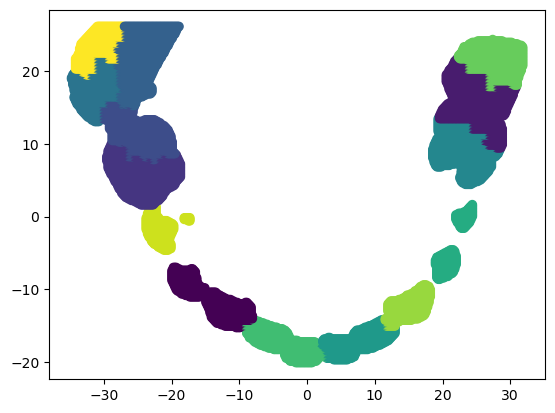

Number of Labels:  14


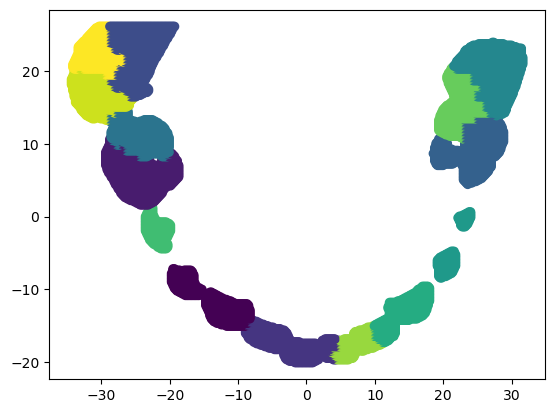

Number of Labels:  14


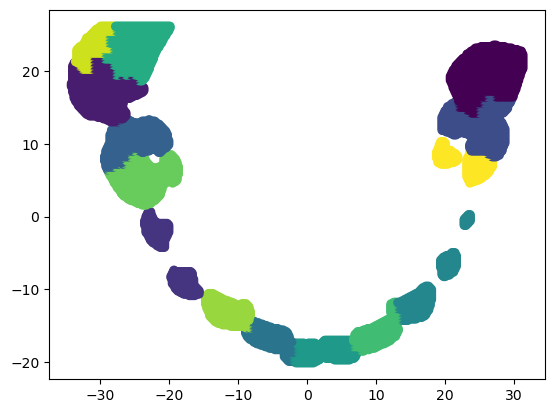

Number of Labels:  13


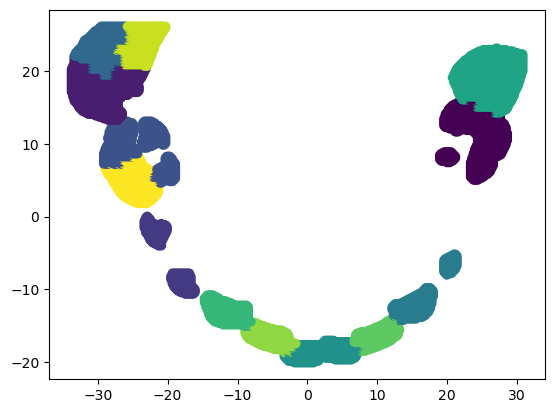

Number of Labels:  13


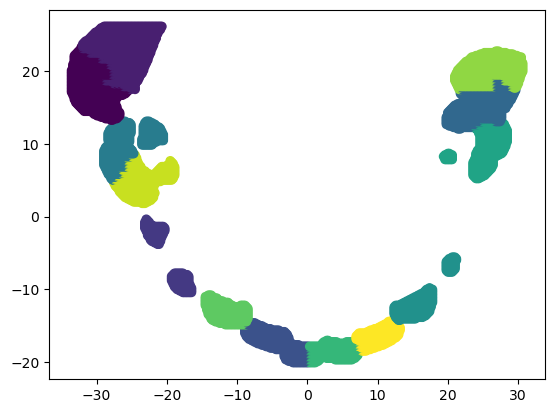

Number of Labels:  13


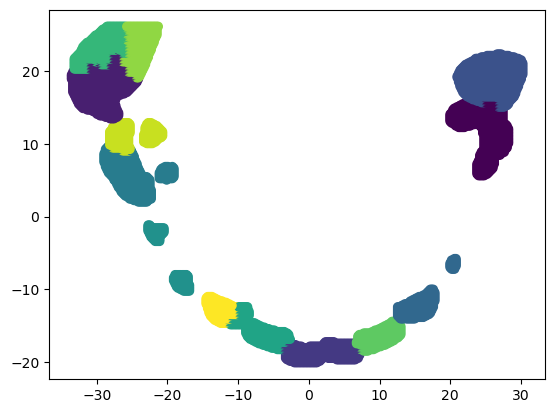

Number of Labels:  11


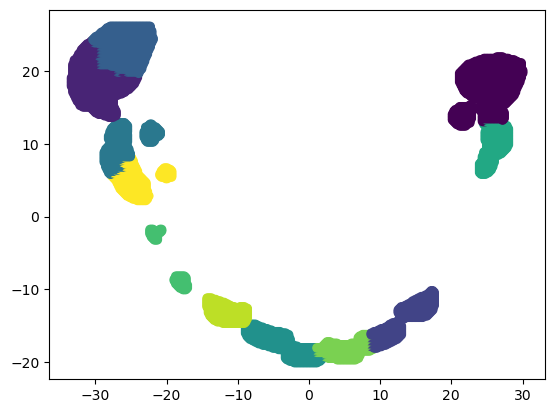

Number of Labels:  11


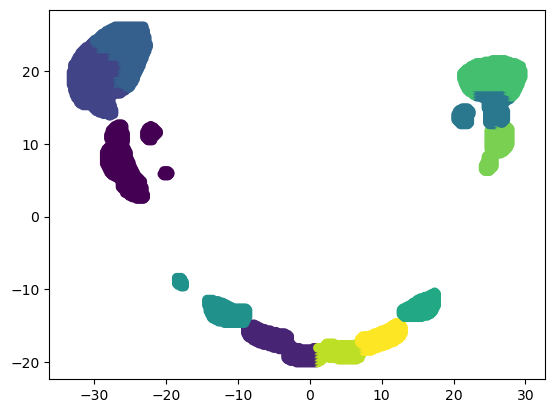

Number of Labels:  11


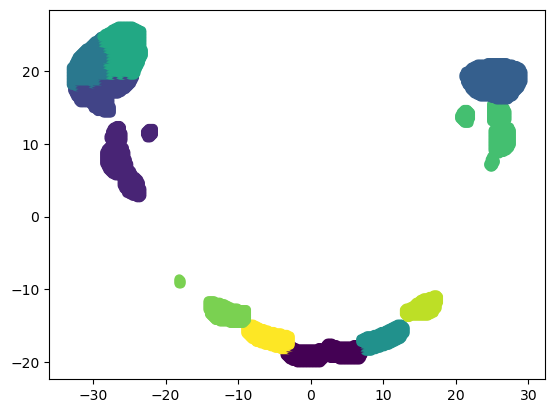

Number of Labels:  12


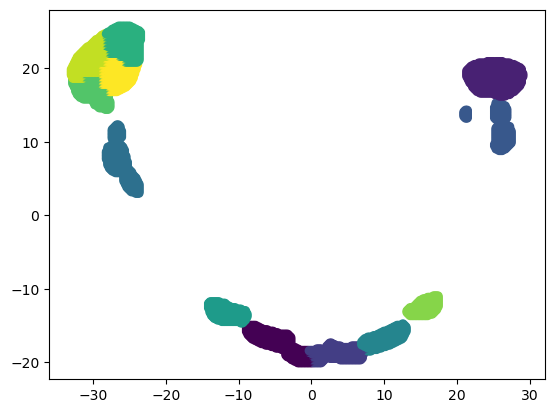

Number of Labels:  11


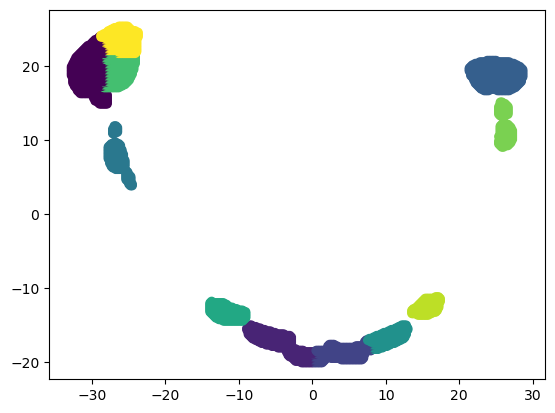

Number of Labels:  11


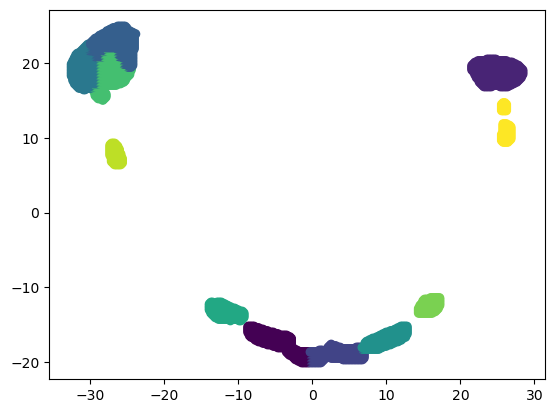

Number of Labels:  11


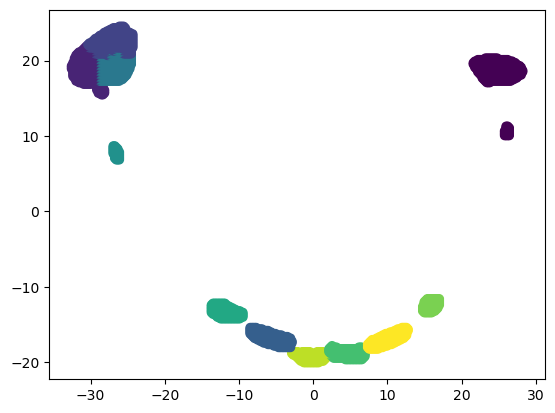

Number of Labels:  9


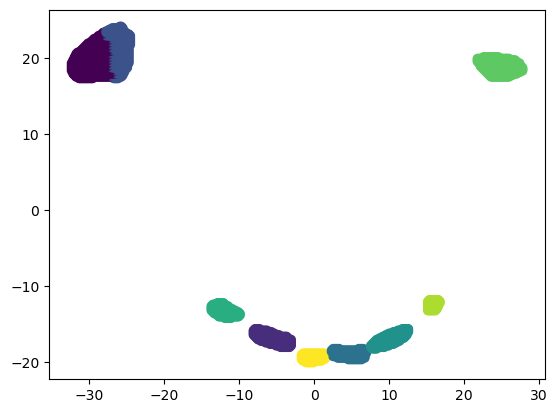

In [151]:
from sklearn.cluster import KMeans,AffinityPropagation,MeanShift,AgglomerativeClustering
dthresh=np.linspace(50,250,len(z_slice))[::-1]
label_z_slice=[]
for i,X in enumerate(z_slice):
    #kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit(X)
    kmeans = AgglomerativeClustering(n_clusters=None,distance_threshold=dthresh[i]).fit(X)
    print("Number of Labels: ",len(np.unique(kmeans.labels_)))
    label_z_slice.append(kmeans.labels_)
    plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)
    plt.show()

In [159]:
label_z_slice[-1],z_slice[].shape

(array([8, 8, 8, ..., 2, 2, 2], dtype=int64), (25483, 2))

In [173]:
z_slice[-1][0]

array([ -1.06925479, -20.05053967])

Number of Labels:  9


(-40.0, 40.0)

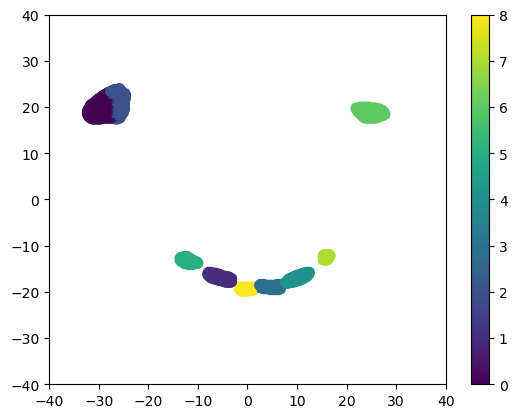

In [201]:
from sklearn.cluster import KMeans,AffinityPropagation,MeanShift,AgglomerativeClustering
X = z_slice[-1]
#kmeans = KMeans(n_clusters=8,n_init='auto').fit(X)
AggC = AgglomerativeClustering(n_clusters=None,distance_threshold=50).fit(X)
print("Number of Labels: ",len(np.unique(AggC.labels_)))
plt.scatter(X[:,0],X[:,1],c=AggC.labels_)
plt.colorbar()
plt.xlim([-40, 40])
plt.ylim([-40, 40])

In [204]:
init_=[]
for i in range(12):
    if i<len(np.unique(AggC.labels_)):
        init_.append([np.mean(z_slice[-1][AggC.labels_==i],axis=0)[0],np.mean(z_slice[-1][AggC.labels_==i],axis=0)[1]])
    else:
        init_.append([60*np.random.random()-30,60*np.random.random()-30])

Number of Labels:  12


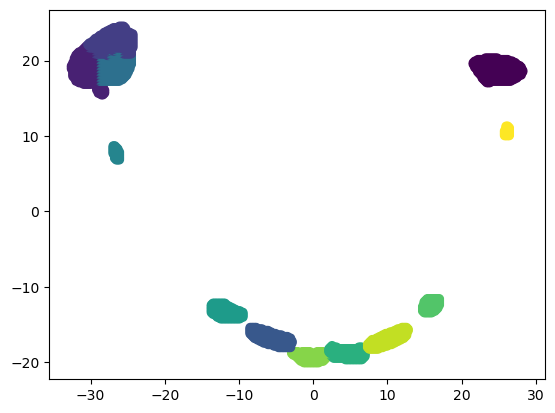

In [209]:
from sklearn.cluster import KMeans,AffinityPropagation,MeanShift,AgglomerativeClustering
X = z_slice[-2]
#kmeans = KMeans(n_clusters=12, init=init_,n_init='auto').fit(X)
kmeans = AgglomerativeClustering(n_clusters=None,distance_threshold=50).fit(X)
print("Number of Labels: ",len(np.unique(kmeans.labels_)))
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)

Number of Labels:  12


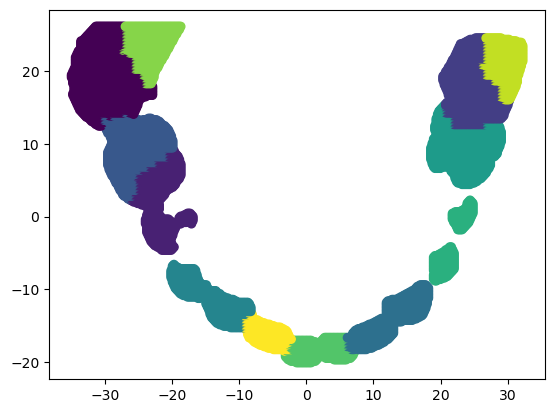

In [217]:
from sklearn.cluster import KMeans,AffinityPropagation,MeanShift,AgglomerativeClustering
X = z_slice[-15]
#kmeans = KMeans(n_clusters=12, init=init_,n_init='auto').fit(X)
kmeans = AgglomerativeClustering(n_clusters=None,distance_threshold=195).fit(X)
print("Number of Labels: ",len(np.unique(kmeans.labels_)))
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)

In [219]:
init_=[]
for i in range(12):
    if i<len(np.unique(kmeans.labels_)):
        init_.append([np.mean(z_slice[-15][kmeans.labels_==i],axis=0)[0],np.mean(z_slice[-15][kmeans.labels_==i],axis=0)[1]])
    else:
        init_.append([60*np.random.random()-30,60*np.random.random()-30])

array([-21.73849408,  23.30676606, -29.0931237 ,   2.7324645 ,
        27.24329911,  -9.98607932, -23.98977453,  21.46430693,
        25.17290036, -24.3695534 , -30.81848864,  12.77707468])

Number of Labels:  12


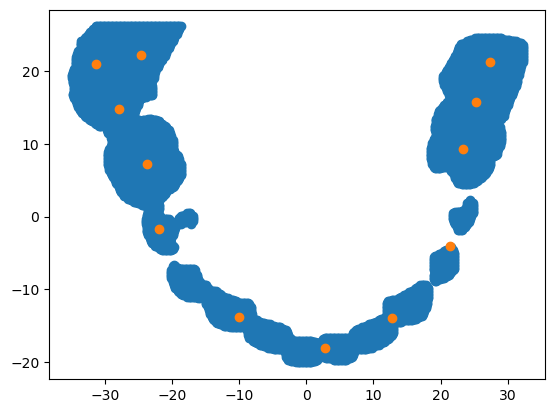

In [232]:
from sklearn.cluster import KMeans,AffinityPropagation,MeanShift,AgglomerativeClustering
from sklearn.mixture import GaussianMixture
X = z_slice[-20]
kmeans = GaussianMixture(n_components=12,n_init=15).fit(X)
#kmeans = AgglomerativeClustering(n_clusters=None,distance_threshold=195).fit(X)
print("Number of Labels: ",len(np.unique(kmeans.means_,axis=0)))
plt.scatter(X[:,0],X[:,1])
plt.scatter(kmeans.means_[:,0],kmeans.means_[:,1])

Number of Labels:  16


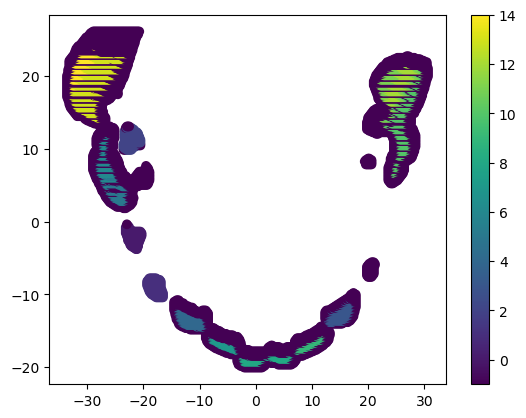

In [265]:
from sklearn.cluster import KMeans,AffinityPropagation,MeanShift,AgglomerativeClustering,HDBSCAN
from sklearn.mixture import GaussianMixture
X = z_slice[-10]
kmeans = HDBSCAN(min_cluster_size=0,cluster_selection_method='leaf').fit(X)
#kmeans = AgglomerativeClustering(n_clusters=None,distance_threshold=195).fit(X)
print("Number of Labels: ",len(np.unique(kmeans.labels_,axis=0)))
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)
plt.colorbar()
#plt.scatter(kmeans.means_[:,0],kmeans.means_[:,1])